In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [2]:
def find_evals(V0, lam, x_max=20, N=1000):
    """
    Find eigenvalues (and eigenvectors) of 1D Schrodinger equation for a Gaussian potential well. 

    Parameters:
        V0: Depth of well
        lam: Width of well
        x_max: boundary of domain
        N: number of grid points

    Returns:
        evals: Eigenenergies
        evecs: Corresponding wavefunctions
    """
    x = np.linspace(-x_max, x_max, N)
    dx = x[1] - x[0]
    V = -V0 * np.exp(-lam * x**2) # Gaussian potential
    H_diag = np.ones(N) / dx**2 + V
    H_offdiag = -np.ones(N-1)/(2 * dx**2)
    H = np.diag(H_diag) + np.diag(H_offdiag, k=1) + np.diag(H_offdiag, k=-1) # Hamiltonian matrix
    evals, evecs = eigh(H)
    return evals, evecs

In [28]:
# Parameters
L = 20.0          # Spatial domain [-L/2, L/2]
N = 512           # Number of grid points
#dx = L / N        # Spatial resolution
x = np.linspace(-L/2, L/2, N, endpoint=False)

V0 = 5.0
lambda_V = 0.1
V = -V0 * np.exp(-x**2 * lambda_V)

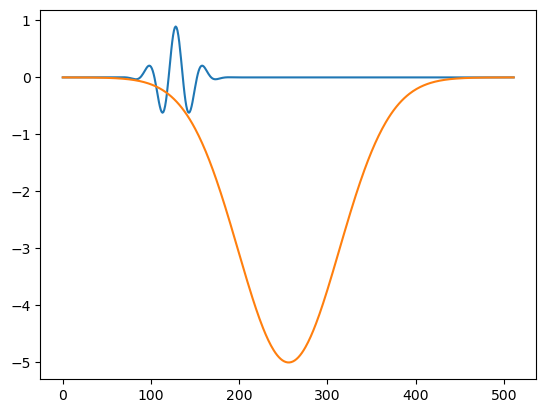

In [30]:
# Initial Gaussian wavepacket
x0 = -5.0
sigma = 0.5
k0 = 5.0
psi0 = (1/(2*np.pi*sigma**2))**(1/4) * np.exp(-(x-x0)**2/(4*sigma**2)) * np.exp(1j*k0*(x-x0)) # Ψ(x,0)

psi_n = find_evals(V0, lambda_V, N=512)[1]
# Project onto eigenstates
for n in range(1, psi_n.shape[1]+1):
    c = lambda n : np.inner(psi0, psi_n[:,n])  # c_n = <ψ_n, Ψ(x,0)>
plt.plot(psi0)
plt.plot(V)

Text(0.5, 1.0, 'Scattering towards a Gaussian potential with Bound States')

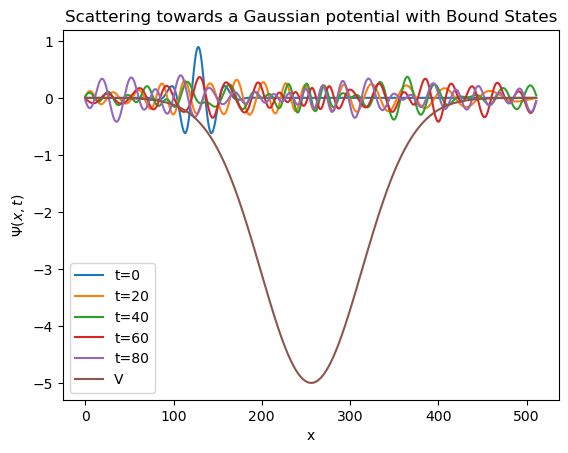

In [32]:
psi_n = find_evals(V0, lambda_V, N=512)[1]
E = find_evals(V0, lambda_V, N=512)[0]

def Psi(x, t):
    """
    Calculate the wave function Ψ(x, t).

    Parameters:
        x (float or np.ndarray): Position(s) at which to evaluate Ψ.
        t (float): Time at which to evaluate Ψ.

    Returns:
        complex or np.ndarray: Value(s) of Ψ(x, t).
    """
    result = np.zeros_like(x, dtype=complex)
    for n in range( psi_n.shape[1]):
        result += c(n) * psi_n[:,n][x] * np.exp(-1j * E[n] * t)
    return result

x = np.arange(0, 512, 1)
for t in np.arange(0, 100, 20):
    plt.plot(Psi(x,t),label=f"t={t}")
plt.plot(V, label="V")
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\Psi(x,t)$")
plt.title("Scattering towards a Gaussian potential with Bound States")

Text(0.5, 1.0, '$\\Psi(x,t)$ for t=0, 40, 80')

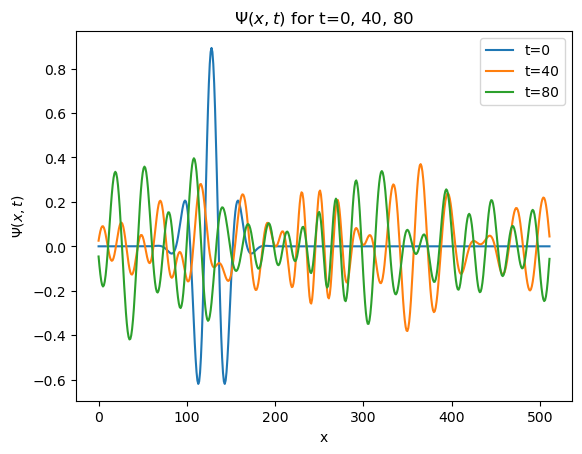

In [36]:
x = np.arange(0, 512, 1)
for t in np.arange(0, 100, 40):
    plt.plot(x, Psi(x,t),label=f"t={t}")
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\Psi(x,t)$")
plt.title(r"$\Psi(x,t)$ for t=0, 40, 80")

In [1]:
V0_new = -4.0
lambda_V_new = 0.1
V_new = -V0_new * np.exp(-x**2 * lambda_V_new)

psi_n = find_evals(V0_new, lambda_V_new, N=512)[1]
E = find_evals(V0_new, lambda_V_new, N=512)[0]

NameError: name 'np' is not defined

Text(0.5, 1.0, 'Scattering towards a Gaussian potential without Bound States')

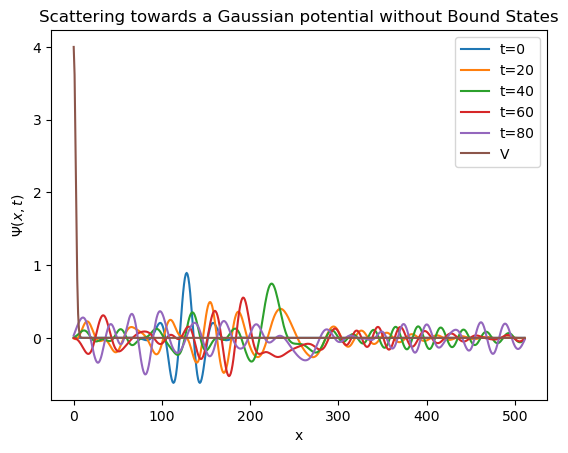

In [40]:
x = np.arange(0, 512, 1)
for t in np.arange(0, 100, 20):
    plt.plot(x, Psi(x,t),label=f"t={t}")

plt.plot(V_new, label="V")
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\Psi(x,t)$")
plt.title("Scattering towards a Gaussian potential without Bound States")

Text(0.5, 1.0, '$\\Psi(x,t)$ for t=0, 40, 80')

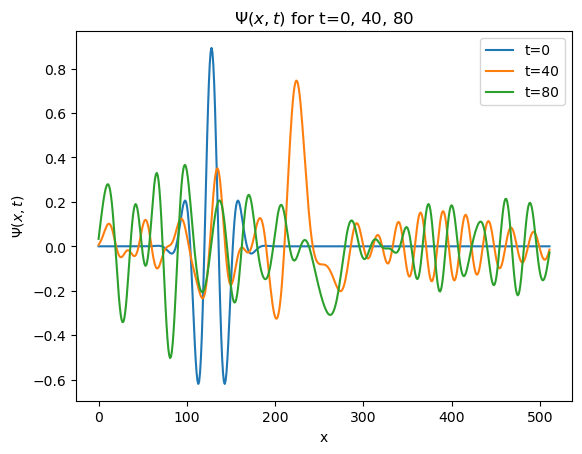

In [42]:
x = np.arange(0, 512, 1)
for t in np.arange(0, 100, 40):
    plt.plot(x, Psi(x,t),label=f"t={t}")
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\Psi(x,t)$")
plt.title(r"$\Psi(x,t)$ for t=0, 40, 80")